# Boston_housing
* Train : test 비율 70 대 30
* 0:13 인데스를 피쳐값으로 두기
* 13을 label
* LinearRegression을 통해서 accuracy구하기
------------------------------------------------------------
* Train : test = 70:30
* 0:13 => feature값으로하고
* 13 => label
* Feature Scaling 을 한후
* LinearRegression을활용하여 MSE
---------------------------------------------------------------
* Train : test = 70:30
* 0:13 => feature값으로하고
* 13 => label
* random  forest 또는 XGB를 활용하여 적정한 feature_select한후 
* LinearRegression을 활용하여 MSE



In [27]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [28]:
boston_house= pd.read_csv('C:/Users/jangd/OneDrive/바탕 화면/python/ml/data_sets/boston_housing.csv')
boston_house

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [29]:
dt_bost_scaler=MinMaxScaler()
dt_bost_scaler.fit(boston_house)
dt_bost_scaled=dt_bost_scaler.transform(boston_house)


In [30]:
dt_bost_scaled_after=pd.DataFrame(data=dt_bost_scaled,columns=boston_house.columns)

In [31]:
y=np.round(dt_bost_scaled_after.iloc[:,-1])
y

0      0.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: MEDV, Length: 506, dtype: float64

In [32]:
X_features=boston_house.columns
X_features

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [33]:
X=np.round(dt_bost_scaled_after.drop(['MEDV'],axis=1))
X


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
502,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
503,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
504,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [34]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, random_state=156)
# y_train = y_train.apply(lambda x : round(x)) # 추가 부분
# y_test = y_test.apply(lambda x : round(x))   # 추가 부분

In [35]:
dt_bost_scaled_after.isnull().sum() # 결측치 확인

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [36]:
bost_ran=RandomForestClassifier(n_estimators=300,max_depth=20,min_samples_leaf=10,min_samples_split=10,random_state=156)

bost_ran.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=300, random_state=156)

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [38]:
bst_importances_vals=bost_ran.feature_importances_
bst_importances= pd.Series(bst_importances_vals,index=X_train.columns)
bst_top6=bst_importances.sort_values(ascending=False)[:6]
bst_top6_featurenames=bst_top6.index
bst_top6_featurenames


Index(['RM', 'ZN', 'PTRATIO', 'INDUS', 'AGE', 'RAD'], dtype='object')

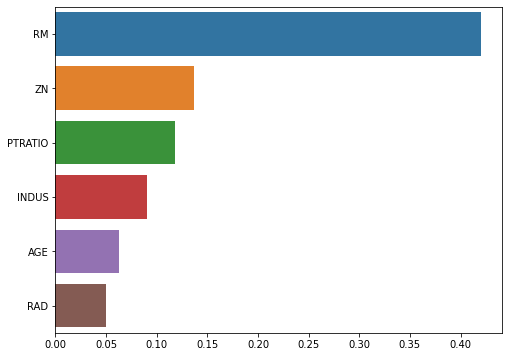

In [39]:
plt.figure(figsize=(8,6))
sns.barplot(x=bst_top6,y=bst_top6.index)
plt.show()


In [40]:
from sklearn.linear_model import LinearRegression
bost_lin=LinearRegression()

In [41]:
bost_lin.fit(X_train, y_train)

LinearRegression()

In [42]:
pred=bost_lin.predict(X_test)
pred

array([ 0.18973281,  0.07075244,  0.57884326,  0.27063215,  0.46859961,
        0.19102418,  0.51256191,  0.15003402, -0.04793344, -0.12761175,
        0.16480727,  0.18328884,  0.50065272,  0.34961925,  0.01591197,
        0.34961925,  0.47100574,  0.03105365,  0.47301837, -0.08784263,
        0.16480727, -0.11405954,  0.07075244, -0.04793344,  0.46859961,
       -0.04793344, -0.27313542,  0.09838679, -0.1351215 , -0.09755696,
        0.50065272,  0.11155627,  0.07075244,  0.07075244,  0.15125506,
        0.11155627, -0.04793344,  0.00573139,  0.14138139,  0.34961925,
        0.58555478,  0.11155627,  0.23093337,  0.03306305,  0.19102418,
        0.01591197,  0.17137965,  0.37725359,  0.46215565,  0.19102418,
        0.66802959,  0.47301837,  0.43340368,  0.27063215,  0.34961925,
        0.26714443,  0.34961925,  0.34961925,  0.09838679, -0.23343664,
        0.09838679,  0.46215565,  0.37725359, -0.04793344, -0.08642519,
        0.47301837,  0.50065272,  0.21865853,  0.11155627, -0.08

In [43]:
# accuracy_score(y_test,pred) # classification에서만 사용됨 따라서 linear에서는 score함수 사용해줘야함
dt_bost_accuracy=bost_lin.score(X_train,y_train)
dt_bost_accuracy_test=bost_lin.score(X_test,y_test)

In [44]:
print(f'훈련데이터 정확도 : {dt_bost_accuracy}\n테스트데이터 정확도 : {dt_bost_accuracy_test}')

훈련데이터 정확도 : 0.3157532183150382
테스트데이터 정확도 : 0.3066592353762654


In [45]:
pred=bost_lin.predict(X_test)

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse= mean_squared_error(y_test,pred)

mae=mean_absolute_error(y_test,pred)

In [47]:
print(f'MSE 값:{mse}\n MAE 값:{mae}')


MSE 값:0.11256584176348806
 MAE 값:0.26657014310419236


In [48]:
boston_house.values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [49]:
boston_feature_name=boston_house.columns
boston_feature_names=np.array(boston_feature_name)


In [50]:
bostonDF=pd.DataFrame(boston_house.values,columns=boston_feature_names)

bostonDF_2=bostonDF[['RM', 'ZN', 'PTRATIO', 'INDUS', 'AGE', 'RAD','MEDV']]
bostonDF_2


,RM,ZN,PTRATIO,INDUS,AGE,RAD,MEDV
0,6.575,18.0,15.3,2.31,65.2,1.0,24.0
1,6.421,0.0,17.8,7.07,78.9,2.0,21.6
2,7.185,0.0,17.8,7.07,61.1,2.0,34.7
3,6.998,0.0,18.7,2.18,45.8,3.0,33.4
4,7.147,0.0,18.7,2.18,54.2,3.0,36.2
...,...,...,...,...,...,...,...
501,6.593,0.0,21.0,11.93,69.1,1.0,22.4
502,6.120,0.0,21.0,11.93,76.7,1.0,20.6
503,6.976,0.0,21.0,11.93,91.0,1.0,23.9
504,6.794,0.0,21.0,11.93,89.3,1.0,22.0


ValueError: num must be 1 <= num <= 5, not 6

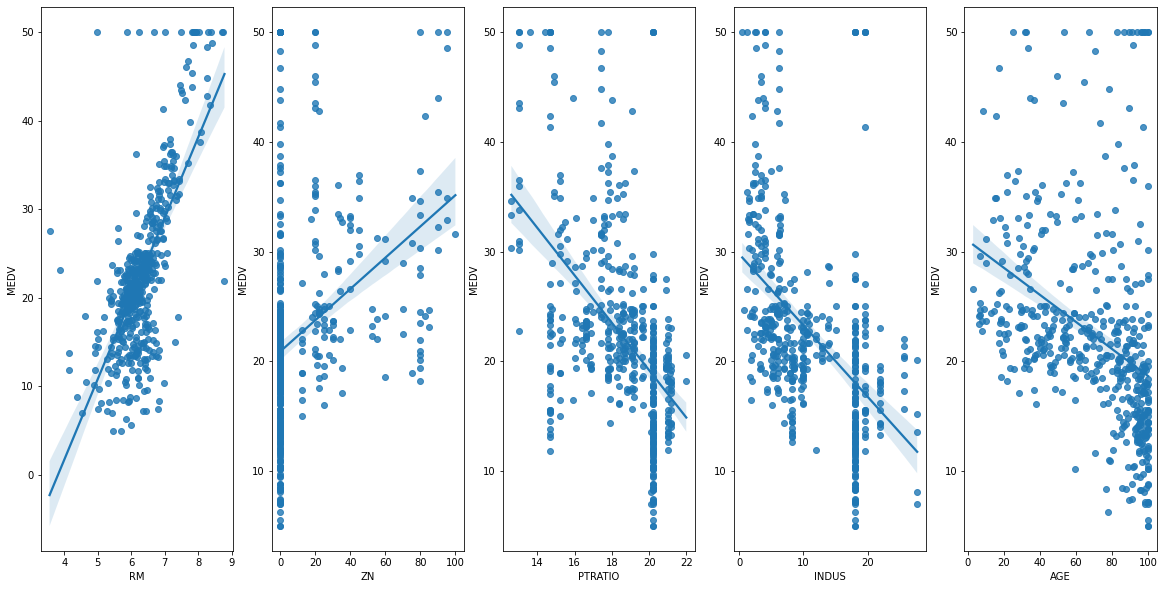

In [51]:
fig,axs=plt.subplots(figsize=(20,10),ncols=5,nrows=1)

lm_features= ['RM', 'ZN', 'PTRATIO', 'INDUS','AGE','RAD']

for i, feature in enumerate(lm_features):
    # row = 1
    # col = i+1
    ax = plt.subplot(1,5,i+1)
    sns.regplot(x=feature,y='MEDV',data=bostonDF)

0
RM
1
ZN
2
PTRATIO
3
INDUS
4
AGE
5
RAD


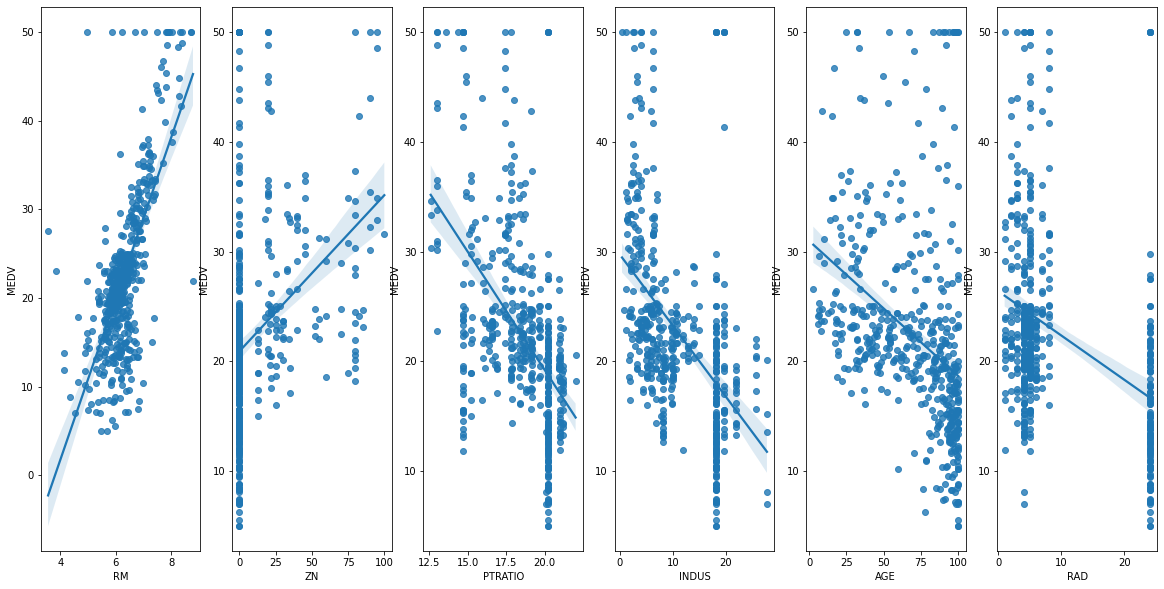

In [54]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(figsize=(20,10),ncols=6,nrows=1)

lm_features= ['RM', 'ZN', 'PTRATIO', 'INDUS','AGE','RAD']

for i , feature in enumerate(lm_features):
    col=i
    print(i)
    print(feature)
    sns.regplot(x=feature,y='MEDV',data=bostonDF,ax=axs[col])